In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [98]:
stealy_run_df = pd.read_csv('Sample_Game_1_RawEventsData.csv')

stealy_run_df.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47


In [99]:
stealy_run_df['Distance Traveled'] = ((stealy_run_df['End X'] - stealy_run_df['Start X']) ** 2 + (stealy_run_df['End Y'] - stealy_run_df['Start Y']) ** 2) ** 0.5
stealy_run_df.head()


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Distance Traveled
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43,0.107703
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21,0.222036
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31,0.156205
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47,0.155242


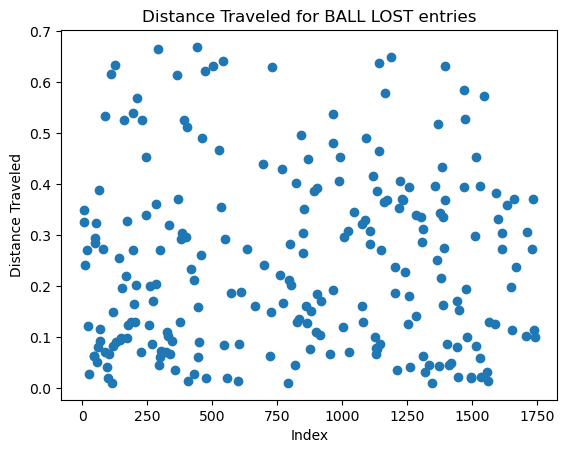

In [100]:
# Filter rows where Type is "BALL LOST"
ball_lost_df = stealy_run_df[stealy_run_df['Type'] == 'BALL LOST']

plt.scatter(ball_lost_df.index, ball_lost_df['Distance Traveled'])
plt.xlabel('Index')
plt.ylabel('Distance Traveled')
plt.title('Distance Traveled for BALL LOST entries')
plt.show()

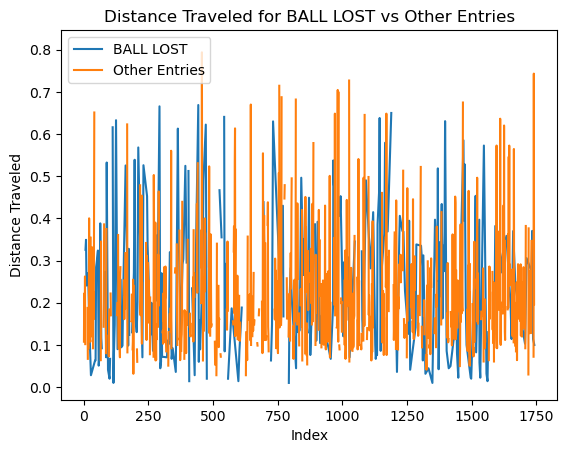

In [101]:
ball_lost_df = stealy_run_df[stealy_run_df['Type'] == 'BALL LOST']
other_entries_df = stealy_run_df[stealy_run_df['Type'] != 'BALL LOST']

# Plot the distances traveled for both sets of entries
plt.plot(ball_lost_df.index, ball_lost_df['Distance Traveled'], label='BALL LOST')
plt.plot(other_entries_df.index, other_entries_df['Distance Traveled'], label='Other Entries')
plt.xlabel('Index')
plt.ylabel('Distance Traveled')
plt.title('Distance Traveled for BALL LOST vs Other Entries')
plt.legend()
plt.show()

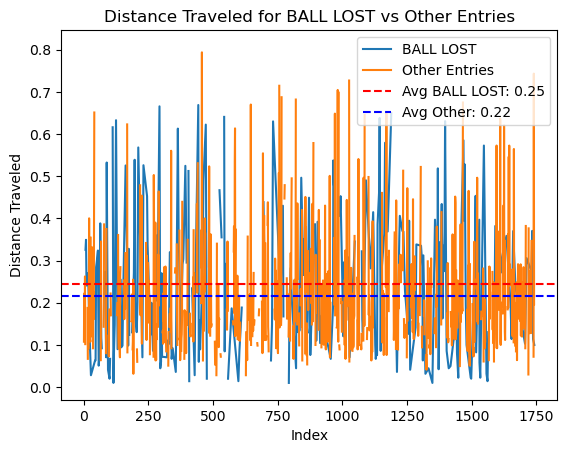

In [102]:
# Create separate DataFrames for "BALL LOST" entries and other entries
ball_lost_df = stealy_run_df[stealy_run_df['Type'] == 'BALL LOST']
other_entries_df = stealy_run_df[stealy_run_df['Type'] != 'BALL LOST']

# Calculate the average distance traveled for each group
avg_distance_ball_lost = ball_lost_df['Distance Traveled'].mean()
avg_distance_other_entries = other_entries_df['Distance Traveled'].mean()

# Plot the distances traveled for both sets of entries using a line plot
plt.plot(ball_lost_df.index, ball_lost_df['Distance Traveled'], label='BALL LOST')
plt.plot(other_entries_df.index, other_entries_df['Distance Traveled'], label='Other Entries')

# Plot the average distances with a horizontal line
plt.axhline(y=avg_distance_ball_lost, color='r', linestyle='--', label=f'Avg BALL LOST: {avg_distance_ball_lost:.2f}')
plt.axhline(y=avg_distance_other_entries, color='b', linestyle='--', label=f'Avg Other: {avg_distance_other_entries:.2f}')

plt.xlabel('Index')
plt.ylabel('Distance Traveled')
plt.title('Distance Traveled for BALL LOST vs Other Entries')
plt.legend()
plt.show()

In [103]:
stealy_run_df['Time Taken'] = stealy_run_df['End Time [s]'] - stealy_run_df['Start Time [s]']
stealy_run_df.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Distance Traveled,Time Taken
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN,NaN,-0.04
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43,0.107703,0.08
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21,0.222036,0.56
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31,0.156205,0.64
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47,0.155242,0.76


In [106]:
stealy_run_df['Speed'] = stealy_run_df['Distance Traveled'] / stealy_run_df['Time Taken']
stealy_run_df.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Distance Traveled,Time Taken,Speed
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN,NaN,-0.04,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43,0.107703,0.08,1.346291
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21,0.222036,0.56,0.396493
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31,0.156205,0.64,0.244070
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47,0.155242,0.76,0.204265


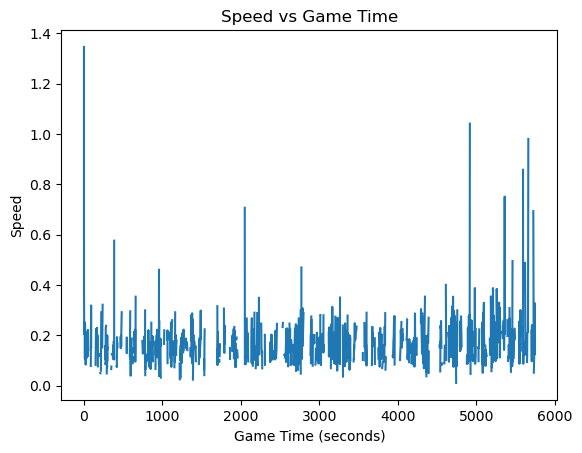

In [117]:
plt.plot(stealy_run_df['End Time [s]'], stealy_run_df['Speed'])
plt.xlabel('Game Time (seconds)')
plt.ylabel('Speed')
plt.title('Speed vs Game Time')
plt.show()